# Regularisation
---

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt


import torch.nn as nn

from torch.utils.data import Dataset, DataLoader
from torch.optim      import Adam, LBFGS
from tqdm import tqdm

In [2]:
a = torch.rand(256, requires_grad=True)


def haar_loss(a):
    loss = torch.zeros(1)
    while len(a) > 1:
        loss += nn.functional.mse_loss(a[0::2], a[1::2]) * len(a)
        a = 0.5*(a[0::2] + a[1::2])
    return loss


N_epochs = 100
lr       = 1.0e-2

optimizer = Adam([a], lr=lr)


losses = []

a_old = a.detach().clone()

for _ in tqdm(range(N_epochs)):
    
    loss_func = haar_loss(a)
    
    losses.append(loss_func.item())
    
    optimizer.zero_grad()
    loss_func.backward ()
    optimizer.step     ()

  0%|                                               | 0/100 [00:00<?, ?it/s]/home/frederikd/.conda/envs/magritte/lib/python3.9/site-packages/torch/autograd/__init__.py:200: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
100%|████████████████████████████████████| 100/100 [00:00<00:00, 586.39it/s]


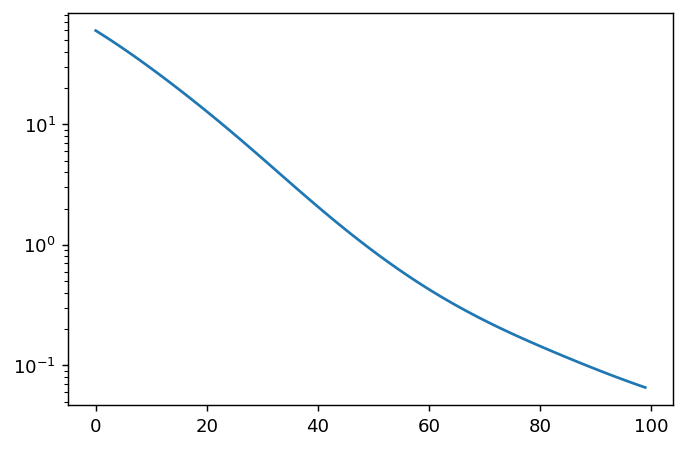

In [3]:
plt.figure(dpi=130)
plt.plot(losses)
plt.yscale('log')

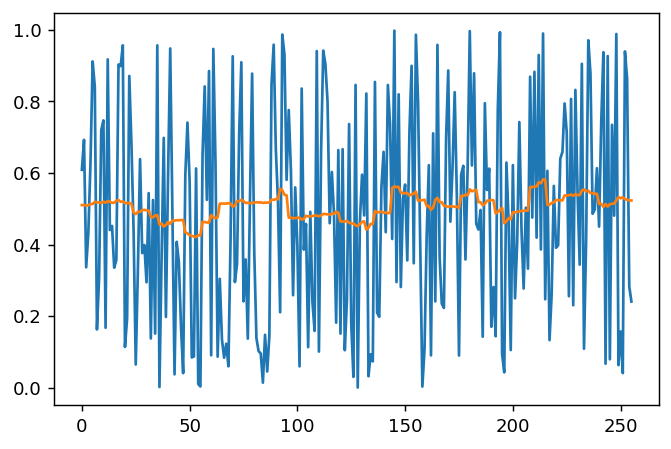

In [4]:
plt.figure(dpi=130)
plt.plot(a_old)
plt.plot(a.data)

In [5]:
a = torch.rand(256, requires_grad=True)


def fourier_loss(a):
    
    fft  = torch.abs(torch.fft.rfft(a))
    size = fft.size(0)
    wts  = 5*torch.arange(size)
    loss = nn.functional.mse_loss(fft*wts, torch.zeros(size, dtype=fft.dtype))
    
    return loss


N_epochs = 100
lr       = 1.0e-2

optimizer = Adam([a], lr=lr)


losses = []

a_old = a.detach().clone()

for _ in tqdm(range(N_epochs)):
    
    loss_func = fourier_loss(a)
    
    losses.append(loss_func.item())
    
    optimizer.zero_grad()
    loss_func.backward ()
    optimizer.step     ()

100%|███████████████████████████████████| 100/100 [00:00<00:00, 2029.99it/s]


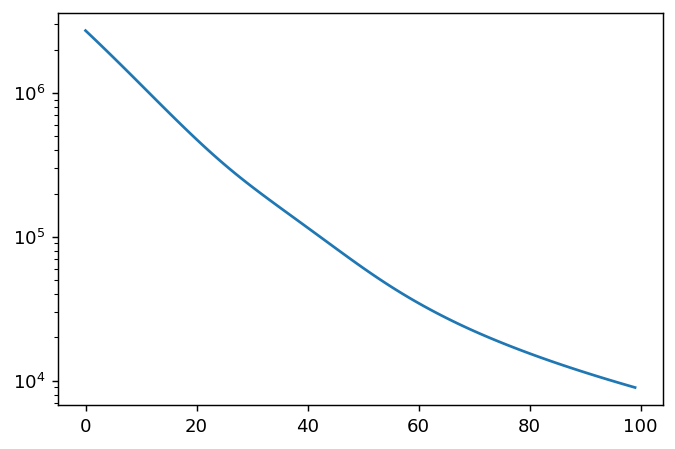

In [6]:
plt.figure(dpi=130)
plt.plot(losses)
plt.yscale('log')

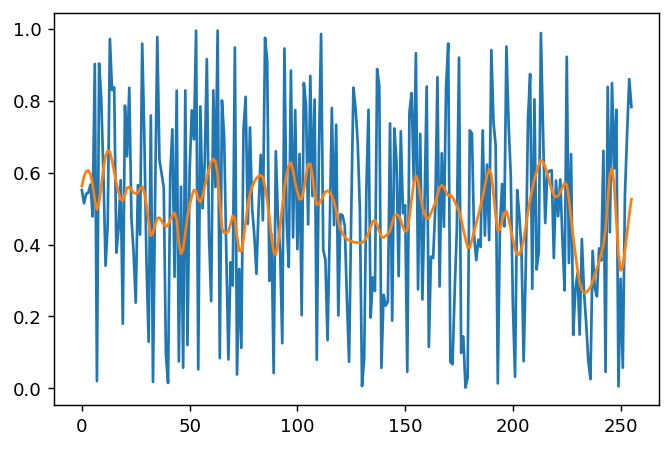

In [7]:
plt.figure(dpi=130)
plt.plot(a_old)
plt.plot(a.data)